# IMPORT PACKAGES

In [ ]:
!pip install emoji

     |████████████████████████████████| 133kB 7.5MB/s 


In [ ]:
# standard
import numpy as np
import pandas as pd
import json

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# text analysis
import re
import emoji

# A) DATA PREPARATION

>### Import Data
source of data:
1. https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia
2. Afif Akbar's Workshop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/My Drive/Colab Notebooks/COURSE - PURWADHIKA - Data Science & Machine Learning/Modul_4_Final_Project/Data/'

df_election = pd.read_csv(directory + 'dataset_2014_presidential_election.csv', encoding='iso-8859-1')
df_ecommerce = pd.read_csv(directory + 'dataset_ecommerce_review.csv', encoding='utf-8', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
df_ig_comment = pd.read_csv(directory + 'dataset_komentar_instagram_cyberbullying.csv', encoding='utf-8')
df_tv_review = pd.read_csv(directory + 'dataset_tweet_sentimen_tayangan_tv.csv', encoding='utf-8')
df_cell_provider_review = pd.read_csv(directory + 'dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
df_movie_review = pd.read_csv(directory + 'dataset_tweet_sentiment_opini_film.csv', encoding='utf-8')
df_dki_election = pd.read_csv(directory + 'dataset_tweet_sentiment_pilkada_DKI_2017.csv', encoding='utf-8')
df_emoji = pd.read_csv(directory + 'dataset_master_emoji.csv', encoding='utf-8')
df_positive_negative_words_1 = pd.read_csv(directory + 'data_positive_negative_words_1.csv', encoding='utf-8')
df_positive_negative_words_2 = pd.read_csv(directory + 'data_positive_negative_words_2.csv', encoding='utf-8')
df_indonlu_train = pd.read_csv(directory + 'dataset_indonlu_train_preprocess.tsv', sep='\t', names=['text', 'sentiment'])
df_indonlu_valid = pd.read_csv(directory + 'dataset_indonlu_valid_preprocess.tsv', sep='\t', names=['text', 'sentiment'])

FileNotFoundError: ignored

>#### Data Sample of Each Dataset

In [ ]:
# df_election
print('df_election')
display(df_election.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())

print('\ndf_tv_review')
display(df_tv_review.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())

print('\ndf_movie_review')
display(df_movie_review.head())

print('\ndf_dki_election')
display(df_dki_election.head())

print('\ndf_emoji')
display(df_emoji.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())

print('\ndf_indonlu_train')
display(df_indonlu_train.head())

print('\ndf_indonlu_valid')
display(df_indonlu_valid.head())

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif



df_indonlu_train


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative



df_indonlu_valid


,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative


>#### Sentiment Distribution Plot of Each Dataset

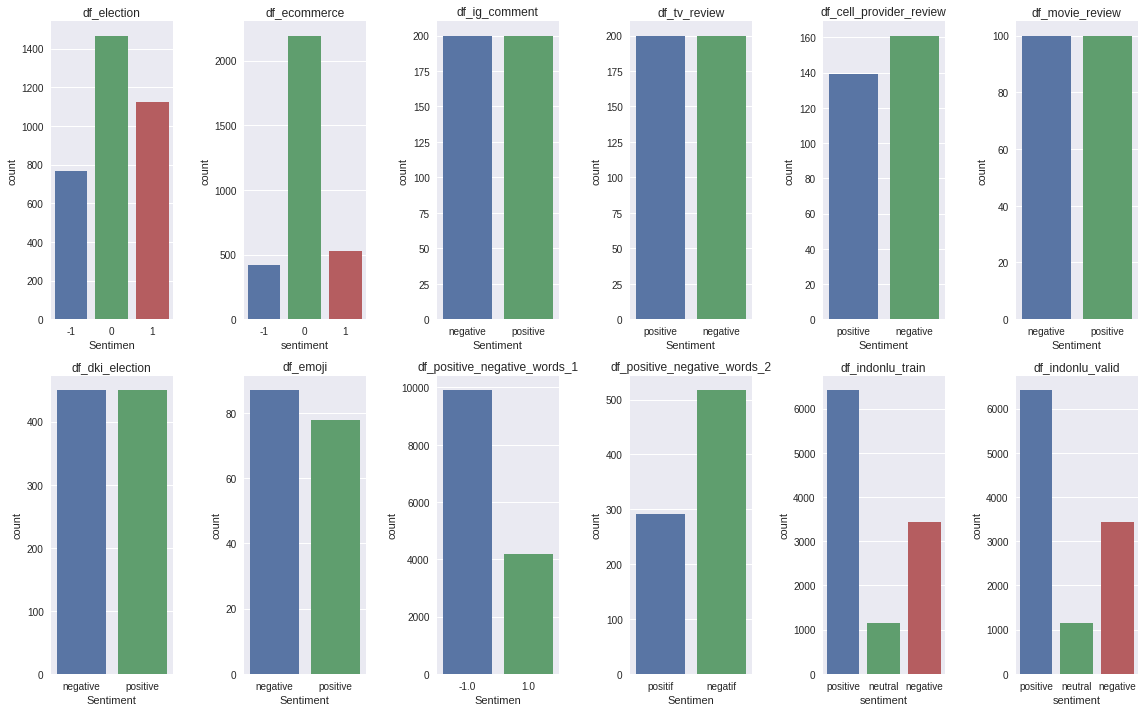

In [ ]:
# 251 -> 2 rows, 5 columns, index n

plt.style.use('seaborn')
plt.figure(figsize=(16,10))
ax = plt.axes()

plt.subplot(261)
sns.countplot(x=df_election.Sentimen)
plt.title('df_election')

plt.subplot(262)
sns.countplot(x=df_ecommerce.sentiment)
plt.title('df_ecommerce')

plt.subplot(263)
sns.countplot(x=df_ig_comment.Sentiment)
plt.title('df_ig_comment')

plt.subplot(264)
sns.countplot(x=df_tv_review.Sentiment)
plt.title('df_tv_review')

plt.subplot(265)
sns.countplot(x=df_cell_provider_review.Sentiment)
plt.title('df_cell_provider_review')

plt.subplot(266)
sns.countplot(x=df_movie_review.Sentiment)
plt.title('df_movie_review')

plt.subplot(267)
sns.countplot(x=df_dki_election.Sentiment)
plt.title('df_dki_election')

plt.subplot(268)
sns.countplot(x=df_emoji.Sentiment)
plt.title('df_emoji')

plt.subplot(269)
sns.countplot(x=df_positive_negative_words_1.Sentimen)
plt.title('df_positive_negative_words_1')

plt.subplot(2,6,10)
sns.countplot(x=df_positive_negative_words_2.Sentimen)
plt.title('df_positive_negative_words_2')

plt.subplot(2,6,11)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_train')

plt.subplot(2,6,12)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_valid')

plt.tight_layout()
plt.show()

# B) Data Format Preparation

>#### Dataframe Modification
- drop unused features
- convert Sentiment Label in text into nominal category (1, 0, -1)
- shifting the column position 

In [ ]:
df_election_m = df_election.drop(columns = ['ID', 'Tweet_ID', 'Tanggal_Tweet', 'Kandidat', 'Aplikasi', 'Lokasi User'])
df_ecommerce_m = df_ecommerce.drop(columns = ['nan1', 'nan2', 'nan3'])


# categorical label encoding & feature position shift
sentiment_label_conversion_Sentiment = {"Sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_sentiment = {"sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_Sentimen = {"Sentimen": {'positif': 1, 'netral': 0, 'negatif': -1}}
sentiment_label_conversion_float_to_integer = {"Sentimen": {1.0: 1, 0.0: 0, -1.0: -1}}


df_ig_comment_m = df_ig_comment.drop(columns='Id') # drop unused columns
df_ig_comment_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_ig_comment_m = df_ig_comment_m.reindex(columns=['Instagram Comment Text', 'Sentiment']) # reorder the columns

df_tv_review_m = df_tv_review.drop(columns=['Id', 'Acara TV', 'Jumlah Retweet']) # drop unused columns
df_tv_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_tv_review_m = df_tv_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_cell_provider_review_m = df_cell_provider_review.drop(columns='Id') # drop unused columns
df_cell_provider_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_cell_provider_review_m = df_cell_provider_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_movie_review_m = df_movie_review.drop(columns='Id') # drop unused columns
df_movie_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_movie_review_m = df_movie_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_dki_election_m = df_dki_election.drop(columns=['Id', 'Pasangan Calon']) # drop unused columns
df_dki_election_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_dki_election_m = df_dki_election_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_emoji_m = df_emoji.drop(columns=['ID', 'Makna Emoji', 'Special Tag']) # drop unused columns
df_emoji_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label

df_positive_negative_words_1_m = df_positive_negative_words_1.drop(columns=['xx', 'xx.1', 'xx.2', 'xx.3', 'xx xx', 'Source', 'Topic', 'xx.4']) # drop unused columns
df_positive_negative_words_1_m.replace(sentiment_label_conversion_float_to_integer) # convert categorical sentiment label to numeric label
df_positive_negative_words_1_m['Sentimen'] = df_positive_negative_words_1_m['Sentimen'].fillna(0.0).astype(int)

df_positive_negative_words_2_m = df_positive_negative_words_2.replace(sentiment_label_conversion_Sentimen) # convert categorical sentiment label to numeric label
# df_positive_negative_words_1.Sentimen.isna().value_counts()

df_indonlu_train_m = df_indonlu_train.copy()
df_indonlu_train_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label

df_indonlu_valid_m = df_indonlu_valid.copy()
df_indonlu_valid_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label


In [ ]:
# df_election
print('df_election')
display(df_election.head())
display(df_election_m.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())
display(df_ecommerce_m.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())
display(df_ig_comment_m.head())

print('\ndf_tv_review')
display(df_tv_review.head())
display(df_tv_review_m.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())
display(df_cell_provider_review_m.head())

print('\ndf_movie_review')
display(df_movie_review.head())
display(df_movie_review_m.head())

print('\ndf_dki_election')
display(df_dki_election.head())
display(df_dki_election_m.head())

print('\ndf_emoji')
display(df_emoji.head())
display(df_emoji_m.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())
display(df_positive_negative_words_1_m.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())
display(df_positive_negative_words_2_m.head())

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1


,Isi_Tweet,Sentimen
0,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,1
1,"capres jokowi,wacapres abraham samad. gubernur...",1
2,"RT @RintisBautista: capres jokowi,wacapres abr...",1
3,capres ( Prabowo ) and cawapres ( jokowi ) and...,1
4,RT @Franliiiii: capres ( Prabowo ) and cawapre...,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN


,review,sentiment
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


,Instagram Comment Text,Sentiment
0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,-1
1,Geblek lo tata...cowo bgt dibela2in balikan......,-1
2,Kmrn termewek2 skr lengket lg duhhh kok labil ...,-1
3,"Intinya kalau kesel dengan ATT nya, gausah ke ...",-1
4,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",-1



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


,Text Tweet,Sentiment
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",1
1,Selamat berbuka puasa Semoga amal ibadah hari ...,1
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",1
3,selamat ya mas @adietaufan masuk hitamputih,1
4,Asiknya nonton Hitam Putih Trans7,1



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


,Text Tweet,Sentiment
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,1
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",1
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,-1
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,-1
4,Selamat malam PENDUSTA <PROVIDER_NAME>,-1



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


,Text Tweet,Sentiment
0,Jelek filmnya... apalagi si ernest gak mutu bg...,-1
1,Film king Arthur ini film paling jelek dari se...,-1
2,@beexkuanlin Sepanjang film gwa berkata kasar ...,-1
3,Ane ga suka fast and furious..menurutku kok je...,-1
4,"@baekhyun36 kan gua ga tau film nya, lu bilang...",-1



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


,Text Tweet,Sentiment
0,Banyak akun kloning seolah2 pendukung #agussil...,-1
1,#agussilvy bicara apa kasihan yaa...lap itu ai...,-1
2,Kalau aku sih gak nunggu hasil akhir QC tp lag...,-1
3,Kasian oh kasian dengan peluru 1milyar untuk t...,-1
4,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,-1



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>


,Emoji,Sentiment
0,😛,-1
1,😠,-1
2,💣,-1
3,💔,-1
4,😕,-1



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN


,Isi_Tweet,Sentimen
0,inkonsisten,-1
1,porno,-1
2,teroris,-1
3,sesat,-1
4,tuntut,-1



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif


,term,Sentimen
0,diakui,1
1,penghargaan,1
2,kecerdasan,1
3,kekaguman,1
4,mengagumi,1


>#### Combining All Dataframe

In [ ]:
# LIST OF MODIFIED DFs before column name change
# df_election_m.head()
# df_ecommerce_m.head()
# df_ig_comment_m.head()
# df_tv_review_m.head()
# df_cell_provider_review_m.head()
# df_movie_review_m.head()
# df_dki_election_m.head()
# df_emoji_m.head()
# df_positive_negative_words_1_m.head()
# df_positive_negative_words_2_m.head()

dataframes = [df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
for i in dataframes:
  print(i.columns)

Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['review', 'sentiment'], dtype='object')
Index(['Instagram Comment Text', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Emoji', 'Sentiment'], dtype='object')
Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['term', 'Sentimen'], dtype='object')


In [ ]:
# change the column names
dataframes = [df_indonlu_train_m, df_indonlu_valid_m, df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
# len(dataframes)
for i in dataframes:
  i.columns = ['text', 'sentiment']

In [ ]:
# LIST OF MODIFIED DFs after column name change
for i in dataframes:
  print(i.columns)

Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')


In [ ]:
df = pd.concat(dataframes, ignore_index=True)

In [ ]:
print(len(df))
df.sample(10)

36034


,text,sentiment
23873,pemboikotan,-1
6667,tempat oleh-oleh nya lengkap dan cukup nyaman ...,1
3075,akses menuju dusun bambu bisa ditempuh melalui...,1
32834,berbangga,1
8435,tak ada yang menandingi restoran sunda di tana...,1
21217,marah,-1
24035,pengotoran,-1
29817,mempersiapkan,-1
28409,toyor,-1
35638,murahan,-1


In [ ]:
df.sentiment.value_counts().iloc[:]

-1    16638
 1    14454
 0     4942
Name: sentiment, dtype: int64

# C) Exploratory Data Analysis

>#### Sentiment Distribution

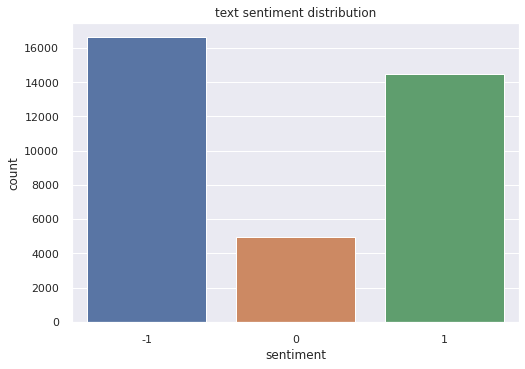

,sentiment,percentage
-1,16638,46.17
1,14454,40.11
0,4942,13.71


In [ ]:
sns.set(style='darkgrid')
sns.countplot(x=df.sentiment)
plt.title('text sentiment distribution')
plt.show()

sentiment_distribution = pd.DataFrame(df.sentiment.value_counts())
sentiment_distribution['percentage'] = list(round(df.sentiment.value_counts(normalize=True) * 100, 2))
sentiment_distribution

>#### Text Analysis

In [ ]:
# count_words = df.text.apply(lambda x: len(x.split(' '))).sum()
# count_mentions = df.text.apply(lambda x: x.count('@')).sum()
# count_hashtags = df.text.apply(lambda x: x.count('#')).sum()
# count_urls = df.text.apply(lambda x: x.count('http') + x.count('bit.ly')).sum()
# count_excl_quest = df.text.apply(lambda x: x.count('!') + x.count('?')).sum()
# count_emojis = df.text.apply(lambda x: len(emojis(x))).sum()

In [ ]:
# print(f"""total words: {count_words}
#       mentions: {count_mentions}
#       hashtags: {count_hashtags}
#       urls: {count_urls}
#       exlamation & question marks: {count_excl_quest}
#       emojis""")

In [ ]:
# all_text = '||'.join(df.text)
# chars = list(all_text)

In [ ]:
# emojis = []
# for n, i in enumerate(chars):
#   if i in emoji.UNICODE_EMOJI:
#     emojis.append([n,i])

# emojis

In [ ]:
# def emojis(text):
#   emoji_list = []
#   for i in text:
#     if i in emoji.UNICODE_EMOJI:
#       emojis.append(i)
#   return emoji_list

# x = count_emojis(df.text[670400])
# len(x)

In [ ]:
# df.text[670400]

- https://www.kaggle.com/damianusdeni/shopee-product-review-sentiment-analysis/edit/run/39225023
- https://colab.research.google.com/drive/1BPfcNsnKytJ9nzeNGDLOkN49qTWnjeg-#scrollTo=T3Lg1lS0URfy
- https://colab.research.google.com/drive/12bOKpAIHEOi1X7kIgApJZkPEMRw48U_e#scrollTo=7B95PTd9UqJI
- https://www.analyticsvidhya.com/blog/2020/11/create-a-pipeline-to-perform-sentiment-analysis-using-nlp/
- https://github.com/devildances/TwitterSentimentAnalysis_Final_Project/blob/master/ETL_DC_EDA.ipynb